# Programming Assignment 1: Linear Regression
> From Machine Learning Course at [coursera.org](https://www.coursera.org/learn/machine-learning/programming/8f3qT/linear-regression)

##### Data

In [5]:
!head ex1/ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [7]:
#% ==================== Part 1: Basic Function ====================
# Complete warmUpExercise()
print('Running warmUpExercise ... \n');
print('5x5 Identity Matrix: \n');
warmUpExercise()

Running warmUpExercise ... 

5x5 Identity Matrix: 



array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Plotting Data ...



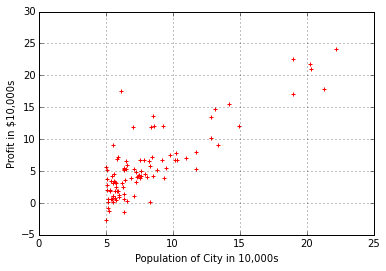

In [8]:
#% ======================= Part 2: Plotting =======================
print('Plotting Data ...\n')
data = np.loadtxt("ex1/ex1data1.txt", delimiter=",")
x = data[:, 0]
y = data[:, 1]
m = len(data) # number of training examples

# Plot Data
# Note: You have to complete the code in plotData()
plotData(x,y)

In [9]:
#% =================== Part 3: Gradient descent ===================
print('Running Gradient Descent ...\n')

# Add a column of ones to x
ones = np.zeros(m) + 1
X = np.array([ones, x]).T

# initialize fitting parameters
theta = np.zeros(2) 

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

# compute and display initial cost
print 'initial cost, theta[0,0]:', computeCost(X, y, theta)
print 
# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)
# print theta to screen
print "Theta found by gradient descent: ", theta[0], theta[1]

Running Gradient Descent ...

initial cost, theta[0,0]: 32.0727338775

100 [-0.57655623  0.85958153] 5.47997558054
200 [-1.12450181  0.9146286 ] 5.17615296289
300 [-1.58199122  0.96058838] 4.96436204618
400 [-1.96395718  0.998961  ] 4.81672526803
500 [-2.28286727  1.03099898] 4.71380953112
600 [-2.54913093  1.05774805] 4.64206826829
700 [-2.77143914  1.08008132] 4.59205833836
800 [-2.95704817  1.09872776] 4.55719704665
900 [-3.11201642  1.114296  ] 4.53289567966
1000 [-3.24140214  1.1272942 ] 4.51595550308
1100 [-3.34942856  1.13814663] 4.50414671954
1200 [-3.43962171  1.14720751] 4.49591496539
1300 [-3.51492556  1.1547726 ] 4.49017671335
1400 [-3.57779807  1.16108882] 4.48617665019
1500 [-3.63029144  1.16636235] 4.48338825659
Theta found by gradient descent:  -3.6302914394 1.16636235034


In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = theta.dot([1, 3.5])
print 'For population = 35,000, we predict a profit of ', predict1 * 10000
predict2 = theta.dot([1, 7])
print 'For population = 70,000, we predict a profit of ', predict2 * 10000

For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


Visualizing J(theta_0, theta_1) ...


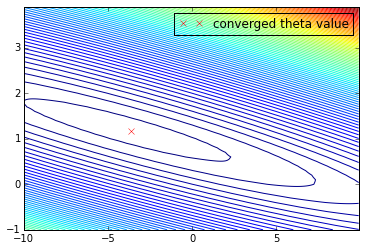

In [11]:
#% ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

# create a mesh of x and y values to plot
theta0_vals, theta1_vals = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-1, 4, 0.1))

# compute the cost values for all the values in the mesh
cost_vals = np.zeros([theta0_vals.shape[0], theta0_vals.shape[1]])
thetap = np.zeros(2) 
for i in xrange(0, cost_vals.shape[0]):
    for j in xrange(0, cost_vals.shape[1]):
        thetap[0] = theta0_vals[i,j]
        thetap[1] = theta1_vals[i,j]
        cost_vals[i,j] = computeCost(X, y, thetap)

## Contour plot
plt.contour(theta0_vals, theta1_vals, cost_vals, 100)
plt.plot(theta[0],theta[1], 'xr', label='converged theta value')
plt.legend()
plt.show()

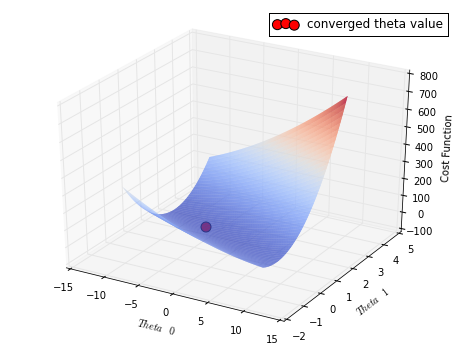

In [12]:
# Surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, cost_vals, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(theta[0], theta[1], 4.48, c='r', marker='o', s=100, label='converged theta value')

ax.set_xlabel('$Theta\;0$')
ax.set_ylabel('$Theta\;1$')
ax.set_zlabel('Cost Function')
plt.legend()
plt.show()

#### Training Data vs. Linear Regression

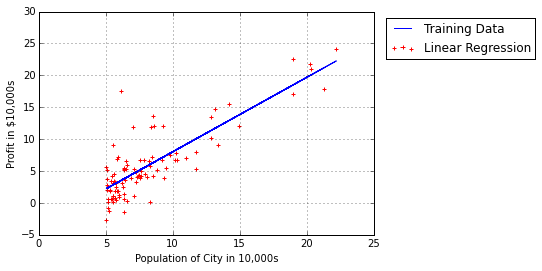

In [13]:
plotData(x,y)
plt.plot(X[:,1], np.dot(X,theta))
plt.legend(['Training Data', 'Linear Regression'], bbox_to_anchor = (1.5,1))
plt.show()

<hr>
## Solutions

In [1]:
import numpy.matlib as npmatlib
def warmUpExercise():
    return np.eye(5)
#     return npmatlib.identity(5)

In [2]:
def plotData(x, y):
    plt.scatter(x, y, c='r', marker='+')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.grid()

Computing the cost, the objective of linear regression is to minimize the cost function:
￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼

$J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$

where the hypothesis $h_\theta(x)$ is given by the linear model:

$h_\theta = \theta^T\;x = \theta_0 + \theta_1\;x_1$

In [3]:
from __future__ import division

def computeCost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    m = len(X)
    h = np.dot(theta, X.T)
    j = 1/(2 * m) * sum( (h[i] - y[i])**2 for i in range(m))
    
    return j

##### Gradient Descent for Linear Regression

repeat until convergence: {

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) $$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} ((h_\theta(x^{(i)}) - y^{(i)}) x^{(i)})$$
}

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    m = len(X)
    
    for i in xrange(1, num_iters + 1):

        # INSERT CODE HERE
        h = np.dot(theta, X.T) # [theta[0] + theta[1] * X[:,1][i] for i in range(m)]
        x = X[:,1]
        
        th0 = sum( (h[j] - y[j]) for j in range(m))
        th1 = sum( (h[j] - y[j]) * x[j] for j in range(m))
        
        theta[0] = theta[0] - alpha * 1/m * th0
        theta[1] = theta[1] - alpha * 1/m * th1
        
        j = computeCost(X, y, theta)
        
        # iterations
        if i % 100 == 0:
            print i, theta, j

    # RETURN RESULT HERE
    result = theta
    return result

<hr>
>  by: Aziz Alto